In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1229.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:37   Log-Likelihood:                -51911.
No. Observations:                4960   AIC:                         1.038e+05
Df Residuals:                    4948   BIC:                         1.039e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.282e+06   7.14

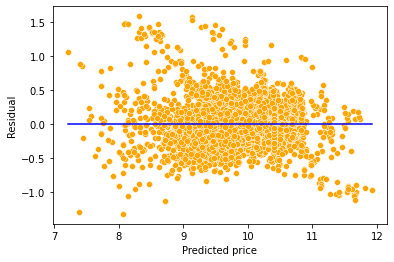

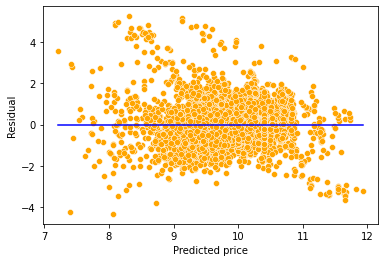

86
                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1122.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:46:46   Log-Likelihood:                 2687.6
No. Observations:                4960   AIC:                            -5173.
Df Residuals:                    4859   BIC:                            -4516.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Interce

In [2]:

# 3) Outliers and their effect (both pred and inf)



# Training data
trainf = pd.read_csv('Car_features_train.csv')
trainp = pd.read_csv('Car_prices_train.csv')
train = pd.merge(trainf, trainp)
# Test data
testf = pd.read_csv('Car_features_test.csv')
testp = pd.read_csv('Car_prices_test.csv')


# Non-log model
ols_object = smf.ols(formula='price~(year+engineSize+mileage+mpg)**2 + I(mileage**2)', data=train)
model = ols_object.fit()
print(model.summary())


# Log model
ols_object = smf.ols(formula='np.log(price)~(year+engineSize+mileage+mpg)**2 + I(mileage**2)', data=train)
model_log = ols_object.fit()
print(model_log.summary())

###################################################################

# An outlier: An obs for which the true response (Y) is far from the value predicted by the model

# To identify, use the res plot again - this time there will be an analytical answer

# Res plot
sns.scatterplot(x = model_log.fittedvalues, y = model_log.resid, color='orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Predicted price')
plt.ylabel('Residual')
plt.show()

# Hard to visually identify where to put the threshold
    # Calculate "studentized residuals" - res / (RSE * sqrt(1 - h))
    # h is the leverage value for any obs - will be discussed shortly
    
# Easily returned with .outlier_test() method
out = model_log.outlier_test()
    
# Res plot, this time with student. res.
sns.scatterplot(x = model_log.fittedvalues, y = out.student_resid, color='orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Predicted price')
plt.ylabel('Residual')
plt.show()

# The y-axis scale is different
# Formal stat. def of an outlier
    # abs(student. res.) > 3
    
# Find the number of outliers
print(np.sum(np.abs(out.student_resid) > 3))

# 86 outliers in the data

# Questions to ask?
    # We have an R2 around 0.8 - decent.
        # Can it go higher if the outliers are accounted for?
    # What causes the outliers?
        # If we have correct responses - figure out a way to add predictors
                                # to account for very high response values
        # If we have wrong responses - erroneous measurements/recording
                                    # Then get rid of those obs
                                    
# In our case, some cars are indeed that expensive
# The predictors we used so far don't fully account for that price range
# Add a predictor - model

# Retrain the stat. model with the new predictor
ols_object = smf.ols(formula='np.log(price)~(year+engineSize+mileage+mpg)**2 + I(mileage**2) + model', data=train)
model_log = ols_object.fit()
print(model_log.summary())

# R2 went way higher - 0.96
# Most predictors are stat. sig., F value stat. sig.
# Better inference

# How about pred?

pred_price_log = model_log.predict(testf)
print(np.sqrt(((testp['price']-np.exp(pred_price_log))**2).mean()))

# Much lower test RMSE - 4.2k - prediction got better as well

# Adding a predictor that accounts for the entirety of the response range
# is very important

# Did we end up with less outliers as well? - Check again the number of out.
# out = model_log.outlier_test()
# print(np.sum(np.abs(out.student_resid) > 3))

# Less outliers
        
# A high leverage point: Obs with an unusual predictor value - too high/low  

In [ ]:
#Model with an interaction term and a variable transformation term
ols_object = smf.ols(formula = 'np.log(price)~(year+engineSize+mileage+mpg)**2+I(mileage**2)+model', data = train)
model_log = ols_object.fit()
#Model summary not printed to save space
#model_log.summary()